In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("pro1.csv")
df.head(5)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,4/1/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/1/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012


In [3]:
df['Junction_Control'].unique()

array(['Automatic traffic signal', 'Giveway or uncontrolled', nan,
       'Authorised person', 'Stop Sign'], dtype=object)

In [4]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Control                                388
2nd_Road_Cla

In [5]:
df.shape

(2043, 32)

In [6]:
df['Junction_Control']=df['Junction_Control'].fillna(method="ffill")

In [7]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Control                                  0
2nd_Road_Cla

In [8]:
del df['Special_Conditions_at_Site']

In [9]:
del df['Carriageway_Hazards']

In [10]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               2043 non-null   object 
 1   Location_Easting_OSGR                        2043 non-null   int64  
 2   Location_Northing_OSGR                       2043 non-null   int64  
 3   Longitude                                    2043 non-null   float64
 4   Latitude                                     2043 non-null   float64
 5   Police_Force                                 2043 non-null   int64  
 6   Accident_Severity                            2043 non-null   int64  
 7   Number_of_Vehicles                           2043 non-null   int64  
 8   Number_of_Casualties                         2043 non-null   int64  
 9   Date                                         2043 non-null   object 
 10  

In [12]:
df['index']=df.index +1
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,index
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002821,2012,1
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,4/1/2012,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01004760,2012,2
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/1/2012,...,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,E01002893,2012,3
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,E01002886,2012,4
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002890,2012,5


In [13]:
df.pivot_table(columns="Road_Type",values="index",aggfunc="count")


Road_Type,Dual Crg-way,One way strt,Round-about,Single Crg-way,Slip road
index,196,88,38,1719,2


In [14]:
df.pivot_table(columns="Speed_limit",values="index",aggfunc="count")


Speed_limit,20,30,40,50,70
index,5,2003,16,16,3


In [15]:
df.pivot_table(columns=["Road_Type","Weather_Conditions"],values="index",aggfunc="count")


Road_Type                  Dual Crg-way                          \
Weather_Conditions Fine with high winds Fine without high winds   
index                                 2                     178   

Road_Type                                                              \
Weather_Conditions Raining with high winds Raining without high winds   
index                                    3                         12   

Road_Type                                                One way strt        \
Weather_Conditions Snowing without high winds Fine without high winds Other   
index                                       1                      76     4   

Road_Type                                                 Round-about  \
Weather_Conditions Raining without high winds Fine without high winds   
index                                       8                      32   

Road_Type                                           Single Crg-way  \
Weather_Conditions Raining without high winds Fine with high winds   
index                                       6                   11   

Road_Type                                                                 \
Weather_Conditions Fine without high winds Other Raining with high winds   
index                                 1512    16                       7   

Road_Type                                                                 \
Weather_Conditions Raining without high winds Snowing without high winds   
index                                     162                          6   

Road_Type                                Slip road  
Weather_Conditions Unknown Fine without high winds  
index                    5                       2

In [16]:
df.pivot_table(columns="Urban_or_Rural_Area",values="index",aggfunc="count")


Urban_or_Rural_Area,1,2
index,2007,36


In [17]:
df.pivot_table(columns="Light_Conditions",values="index",aggfunc="count")


Light_Conditions,Darkeness: No street lighting,Darkness: Street lighting unknown,Darkness: Street lights present and lit,Darkness: Street lights present but unlit,Daylight: Street light present
index,1,4,580,9,1449


In [18]:
df.pivot_table(columns=["Speed_limit","Road_Type"],values="index",aggfunc="count")


Speed_limit           20                          30                           \
Road_Type   One way strt Single Crg-way Dual Crg-way One way strt Round-about   
index                  2              3          162           86          38   

Speed_limit                                    40                          50  \
Road_Type   Single Crg-way Slip road Dual Crg-way Single Crg-way Dual Crg-way   
index                 1715         2           15              1           16   

Speed_limit           70  
Road_Type   Dual Crg-way  
index                  3

In [19]:
df.pivot_table(columns=["Road_Surface_Conditions","Road_Type"],values="index",aggfunc="count")


Road_Surface_Conditions          Dry                                          \
Road_Type               Dual Crg-way One way strt Round-about Single Crg-way   
index                            163           77          31           1446   

Road_Surface_Conditions              Frost/Ice                              \
Road_Type               Slip road Dual Crg-way One way strt Single Crg-way   
index                           2            1            2              4   

Road_Surface_Conditions         Snow                    Wet/Damp               \
Road_Type               Dual Crg-way Single Crg-way Dual Crg-way One way strt   
index                              1              4           31            9   

Road_Surface_Conditions                             
Road_Type               Round-about Single Crg-way  
index                             7            265

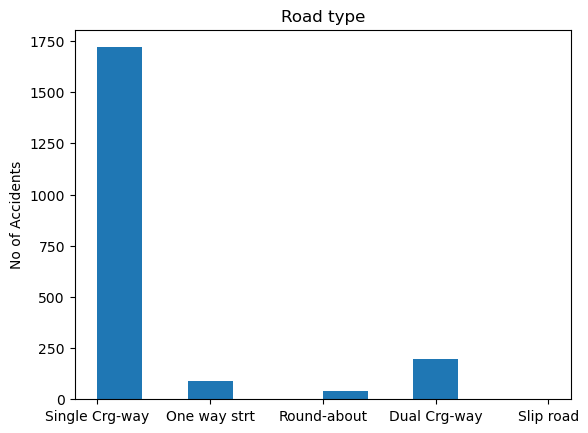

In [20]:
x=df.index
y=df.Road_Type
plt.title("Road type")
plt.ylabel("No of Accidents")

plt.hist(y)
plt.show()

<Axes: xlabel='Road_Type', ylabel='count'>

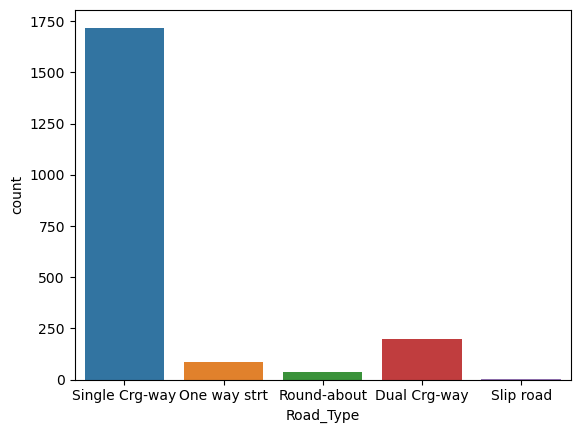

In [21]:
sns.countplot(x="Road_Type",data=df)


<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

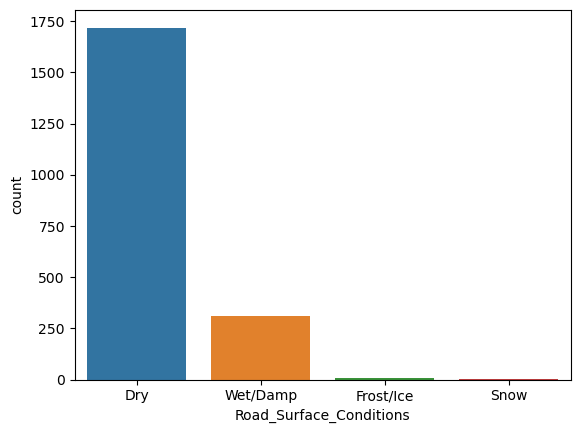

In [22]:
sns.countplot(x="Road_Surface_Conditions",data=df)


<Axes: xlabel='Speed_limit', ylabel='count'>

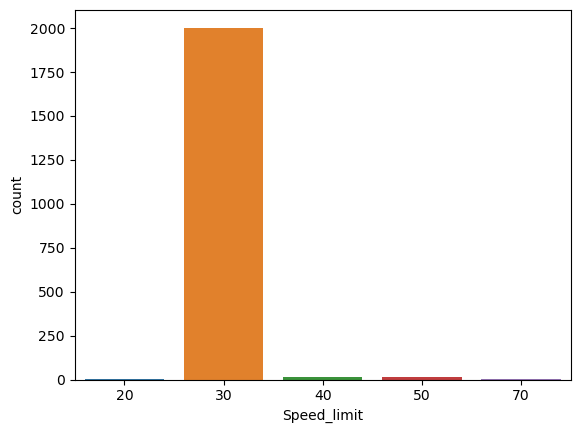

In [23]:
sns.countplot(x="Speed_limit",data=df)


<Axes: xlabel='Urban_or_Rural_Area', ylabel='count'>

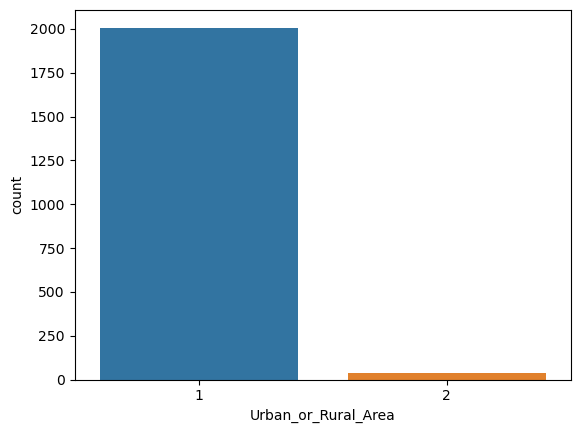

In [24]:
sns.countplot(x="Urban_or_Rural_Area",data=df )


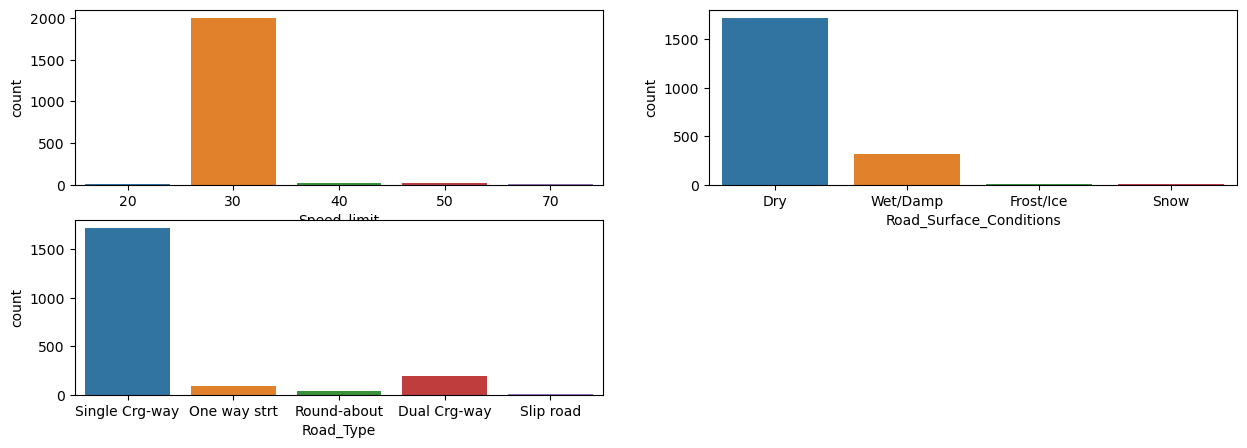

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(x="Speed_limit",data=df)
plt.subplot(2,2,2)
sns.countplot(x="Road_Surface_Conditions",data=df)
plt.subplot(2,2,3)
sns.countplot(x="Road_Type",data=df)
plt.show()

<Axes: xlabel='Road_Surface_Conditions', ylabel='count'>

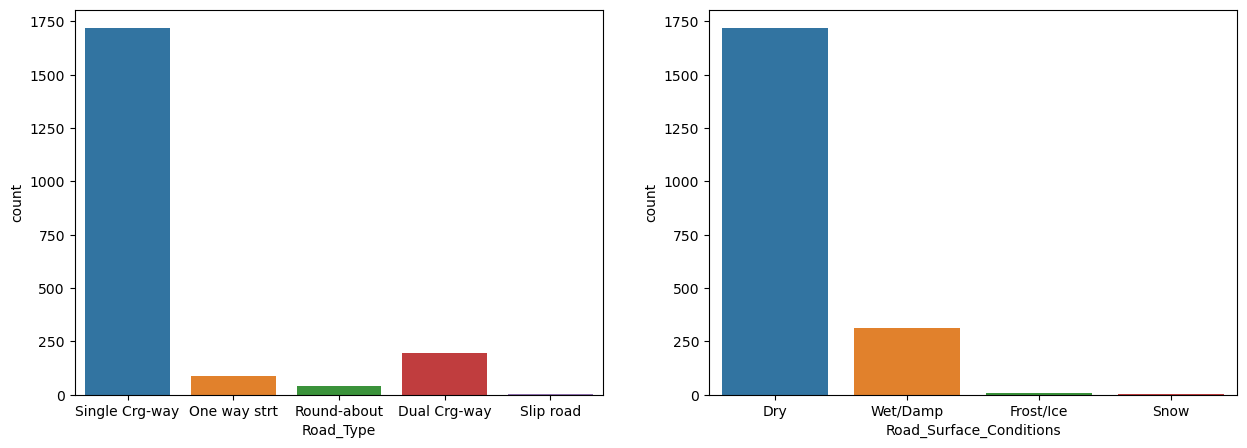

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="Road_Type",data=df)
plt.subplot(1,2,2)
sns.countplot(x="Road_Surface_Conditions",data=df)

In [27]:
df['Police_Force'].value_counts()

Police_Force
1     1675
48     368
Name: count, dtype: int64

In [28]:
df.shape

(2043, 31)

In [29]:
df.loc[df['Police_Force'] == 1, 'police_report'] = 1 
df.loc[df['Police_Force'] == 48, 'police_report'] = 0 

In [30]:
df = df.astype({'police_report':'int'})
df['police_report'].value_counts()

police_report
1    1675
0     368
Name: count, dtype: int64

<Axes: xlabel='police_report', ylabel='count'>

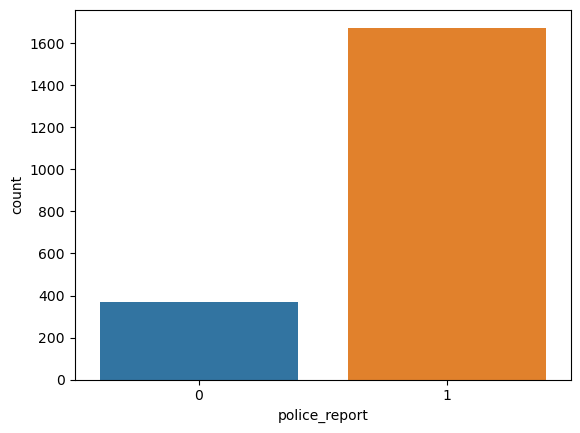

In [31]:
sns.countplot(x=df['police_report'],data=df )

In [32]:
df.head(2)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,index,police_report
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01002821,2012,1,1
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,4/1/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,E01004760,2012,2,1
